In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "lazio"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,12,Lazio,1,1,2,0,2,0,0,...,0.0,0.0,0.0,0.0,50.00,100.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,12,Lazio,0,0,0,0,0,-2,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,-100.00,-100.00
2,2020-02-27T18:00:00,12,Lazio,0,0,0,0,0,0,0,...,0.0,428.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,12,Lazio,0,0,0,0,0,0,0,...,0.0,59.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,12,Lazio,3,0,3,0,3,3,3,...,0.0,68.0,0.0,0.0,0.00,100.00,4.41,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,2021-01-11T17:00:00,12,Lazio,2887,321,3208,75673,78881,96,1254,...,45.0,10501.0,4829.0,61.0,10.01,4.07,11.94,25.97,-0.62,0.12
322,2021-01-12T17:00:00,12,Lazio,2871,326,3197,75390,78587,-294,1381,...,42.0,13201.0,4896.0,-283.0,10.20,4.07,10.46,28.21,1.56,-0.37
323,2021-01-13T17:00:00,12,Lazio,2892,313,3205,75018,78223,-364,1612,...,41.0,13678.0,6504.0,-372.0,9.77,4.10,11.79,24.78,-3.99,-0.46
324,2021-01-14T17:00:00,12,Lazio,2814,295,3109,74871,77980,-243,1816,...,47.0,14005.0,6972.0,-147.0,9.49,3.99,12.97,26.05,-5.75,-0.31


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 1, 15, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 1394
Nuovi tamponi: 28242.0
Percentuale nuovi positivi/nuovi tamponi: 4.9 %
Nuovi guariti: 1583.0
Nuovi deceduti: 36.0
Variazione positivi ricoverati con sintomi: -34.0
Variazione positivi in terapia intensiva: 4.0
Variazione positivi in isolamento dimiciliare: -195.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 1, 15, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-16T17:00:00,12,Lazio,3099,278,3377,65893,69270,1961,2407,...,34.0,19699.0,13538.0,2017.0,8.23,4.88,12.22,17.78,1.46,2.91
1,2020-11-17T17:00:00,12,Lazio,3066,308,3374,67881,71255,1985,2538,...,59.0,25058.0,21008.0,1988.0,9.13,4.74,10.13,12.08,10.79,2.87
2,2020-11-18T17:00:00,12,Lazio,3056,318,3374,70117,73491,2236,2866,...,80.0,26869.0,21558.0,2236.0,9.43,4.59,10.67,13.29,3.25,3.14
3,2020-11-19T17:00:00,12,Lazio,3103,329,3432,72109,75541,2050,2697,...,61.0,27519.0,23893.0,1992.0,9.59,4.54,9.80,11.29,3.46,2.79
4,2020-11-20T17:00:00,12,Lazio,3202,337,3539,74207,77746,2205,2667,...,41.0,26887.0,21922.0,2098.0,9.52,4.55,9.92,12.17,2.43,2.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-01-11T17:00:00,12,Lazio,2887,321,3208,75673,78881,96,1254,...,45.0,10501.0,4829.0,61.0,10.01,4.07,11.94,25.97,-0.62,0.12
57,2021-01-12T17:00:00,12,Lazio,2871,326,3197,75390,78587,-294,1381,...,42.0,13201.0,4896.0,-283.0,10.20,4.07,10.46,28.21,1.56,-0.37
58,2021-01-13T17:00:00,12,Lazio,2892,313,3205,75018,78223,-364,1612,...,41.0,13678.0,6504.0,-372.0,9.77,4.10,11.79,24.78,-3.99,-0.46
59,2021-01-14T17:00:00,12,Lazio,2814,295,3109,74871,77980,-243,1816,...,47.0,14005.0,6972.0,-147.0,9.49,3.99,12.97,26.05,-5.75,-0.31


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

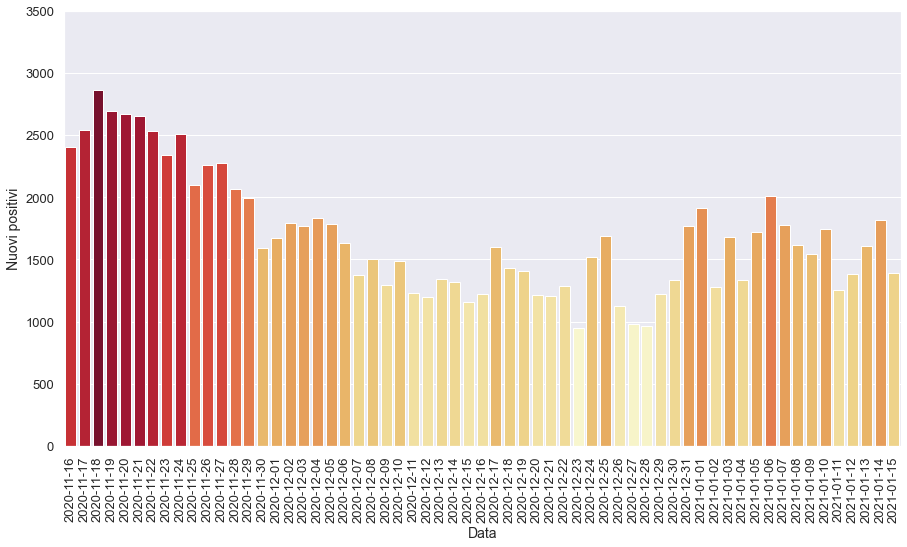

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

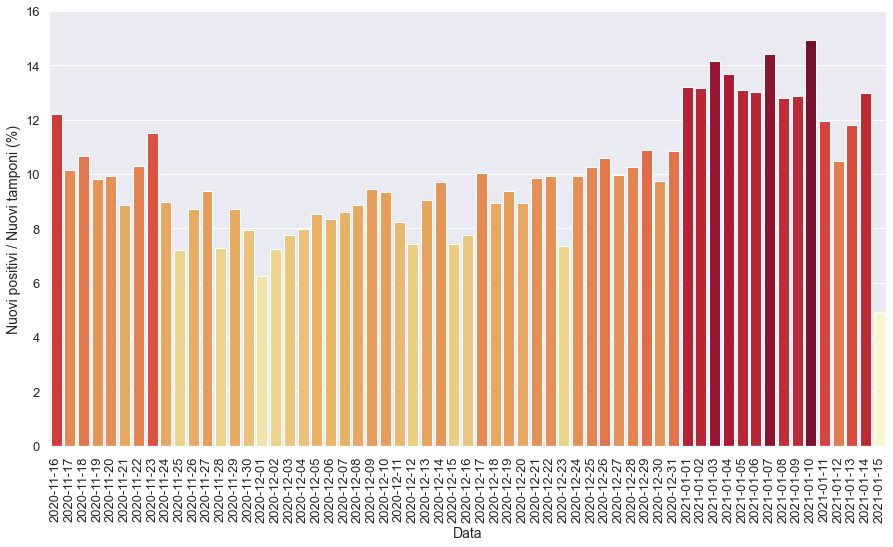

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

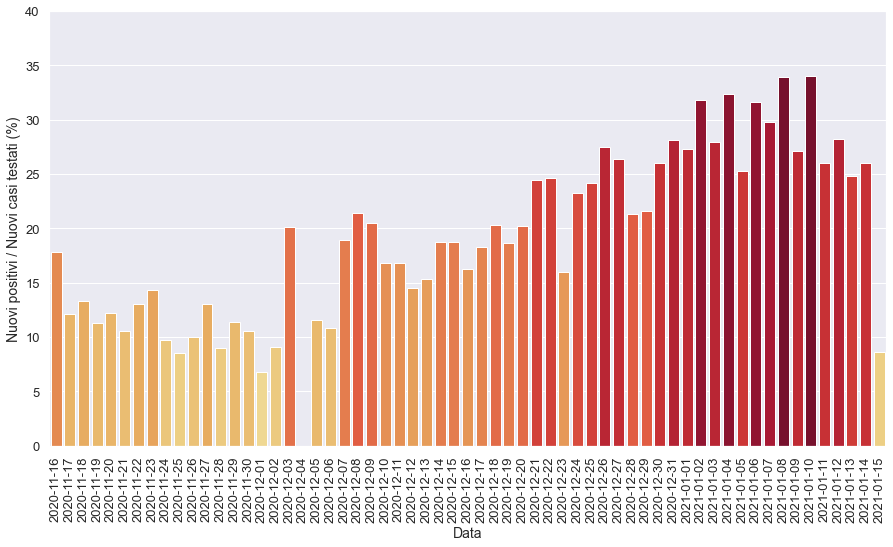

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

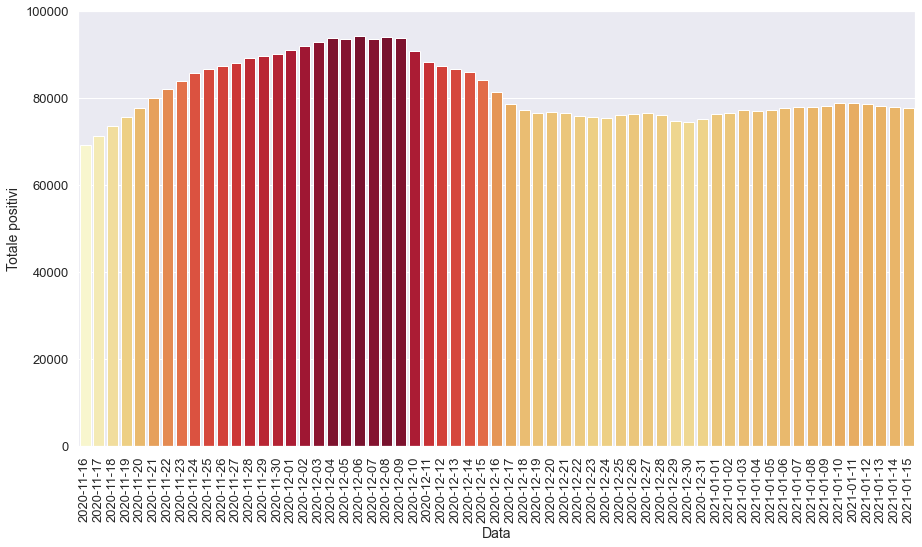

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

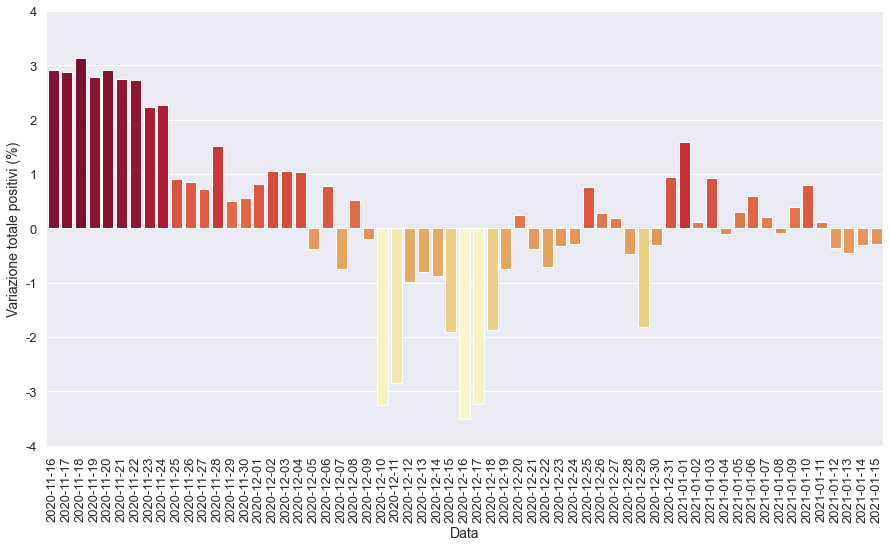

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

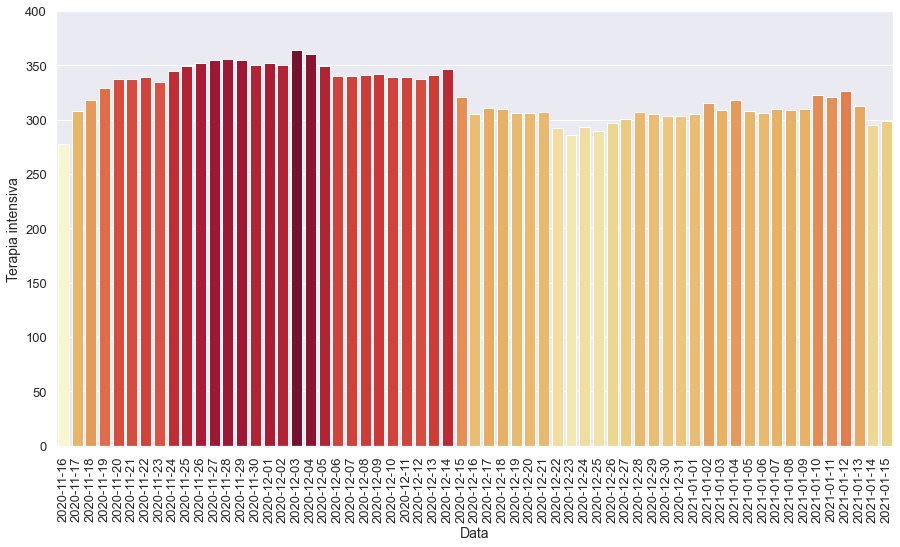

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

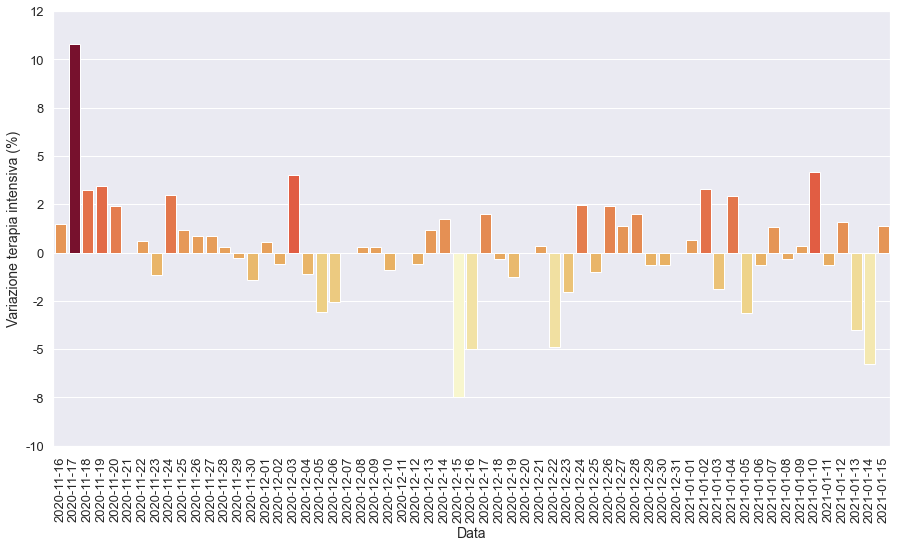

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

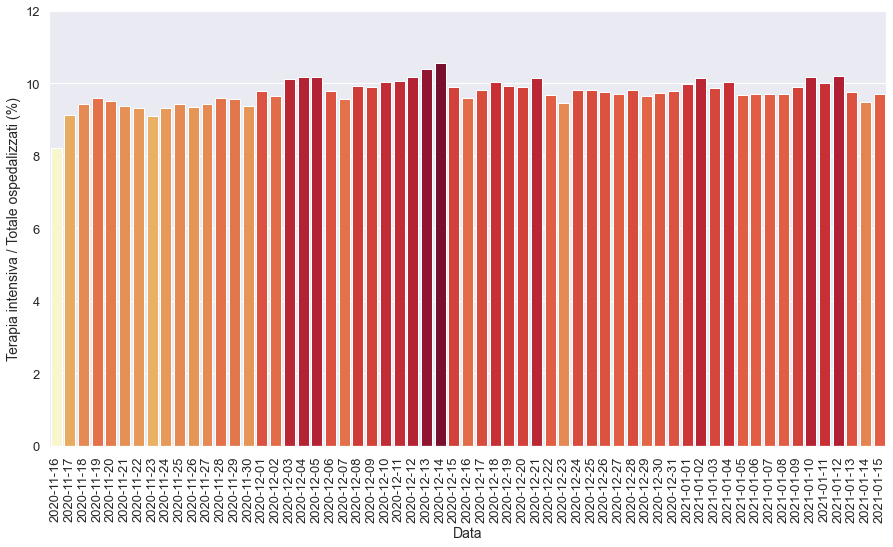

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

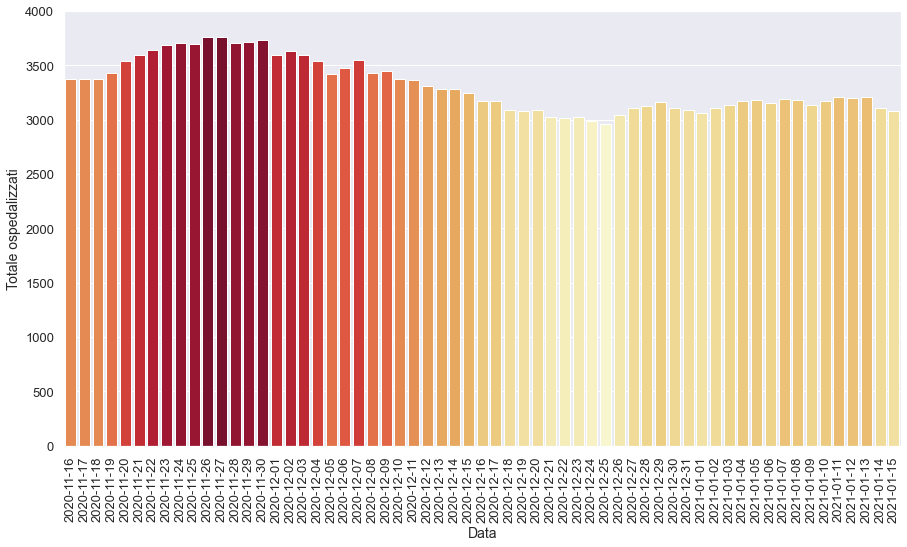

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

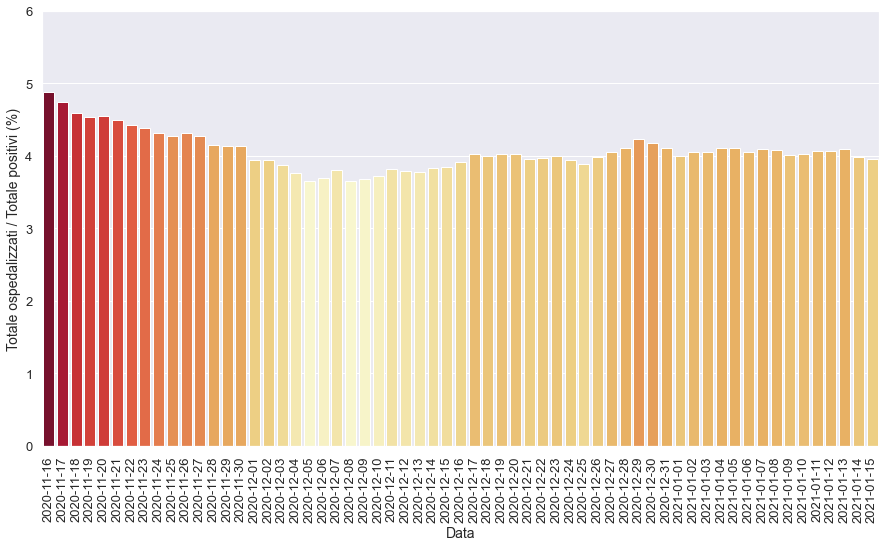

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

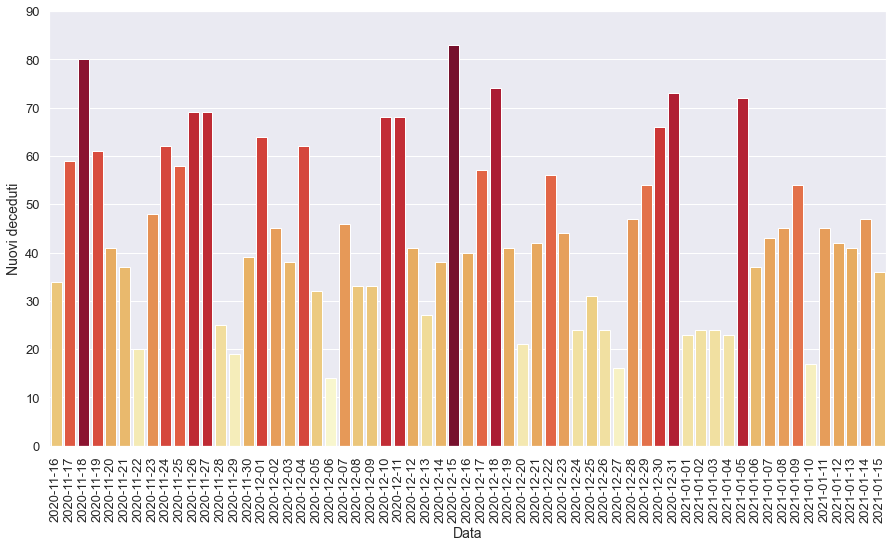

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

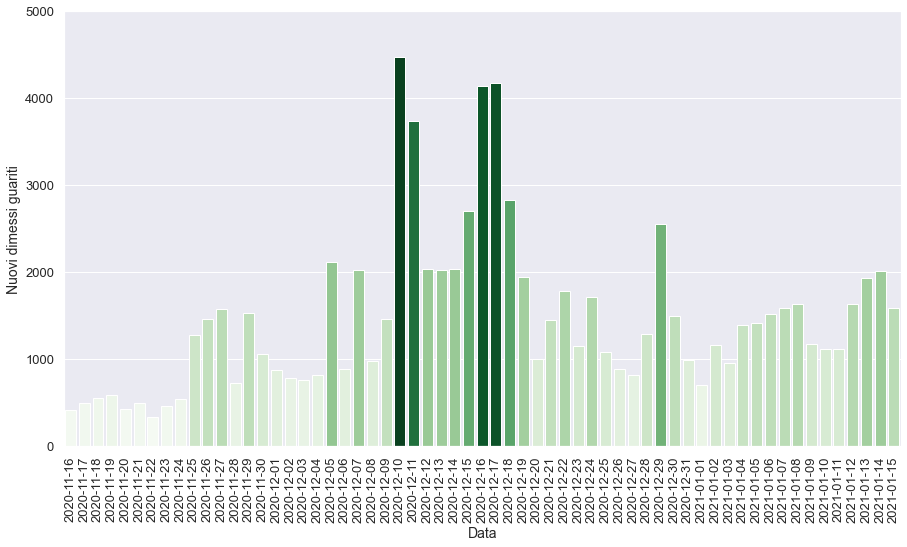

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-16T17:00:00,12,Lazio,2869,305,3174,78093,81267,-2954,1220,...,40.0,15705.0,7516.0,-2886.0,9.61,3.91,7.77,16.23,-4.98,-3.51
1,2020-12-17T17:00:00,12,Lazio,2860,311,3171,75459,78630,-2637,1597,...,57.0,15906.0,8732.0,-2634.0,9.81,4.03,10.04,18.29,1.97,-3.24
2,2020-12-18T17:00:00,12,Lazio,2780,310,3090,74069,77159,-1471,1428,...,74.0,15984.0,7045.0,-1390.0,10.03,4.00,8.93,20.27,-0.32,-1.87
3,2020-12-19T17:00:00,12,Lazio,2773,306,3079,73510,76589,-570,1410,...,41.0,15052.0,7569.0,-559.0,9.94,4.02,9.37,18.63,-1.29,-0.74
4,2020-12-20T17:00:00,12,Lazio,2784,306,3090,73690,76780,191,1213,...,21.0,13581.0,6000.0,180.0,9.90,4.02,8.93,20.22,0.00,0.25
5,2020-12-21T17:00:00,12,Lazio,2720,307,3027,73465,76492,-288,1205,...,42.0,12237.0,4921.0,-225.0,10.14,3.96,9.85,24.49,0.33,-0.38
6,2020-12-22T17:00:00,12,Lazio,2720,292,3012,72937,75949,-543,1288,...,56.0,12982.0,5231.0,-528.0,9.69,3.97,9.92,24.62,-4.89,-0.71
7,2020-12-23T17:00:00,12,Lazio,2740,286,3026,72676,75702,-247,946,...,44.0,12892.0,5911.0,-261.0,9.45,4.00,7.34,16.00,-2.05,-0.33
8,2020-12-24T17:00:00,12,Lazio,2690,293,2983,72508,75491,-211,1519,...,24.0,15313.0,6524.0,-168.0,9.82,3.95,9.92,23.28,2.45,-0.28
9,2020-12-25T17:00:00,12,Lazio,2666,290,2956,73118,76074,583,1691,...,31.0,16516.0,7002.0,610.0,9.81,3.89,10.24,24.15,-1.02,0.77


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

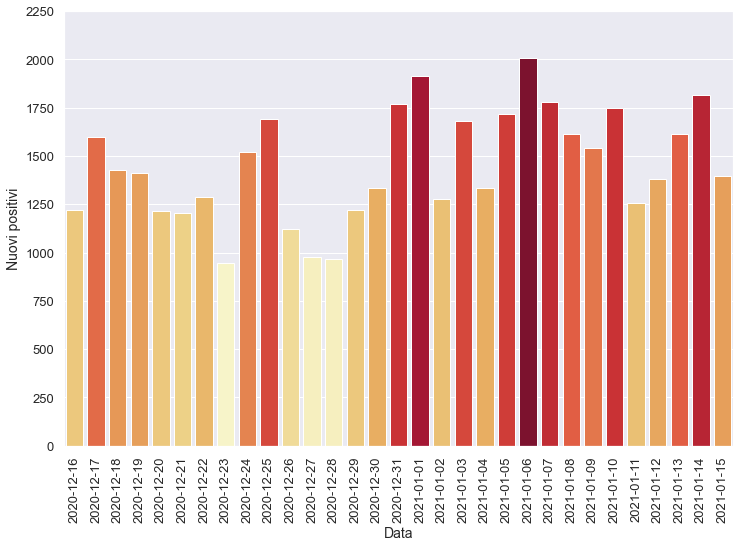

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

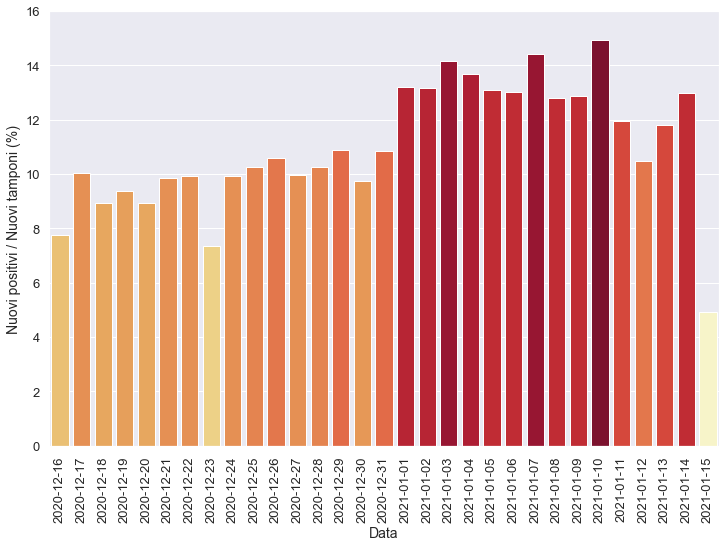

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

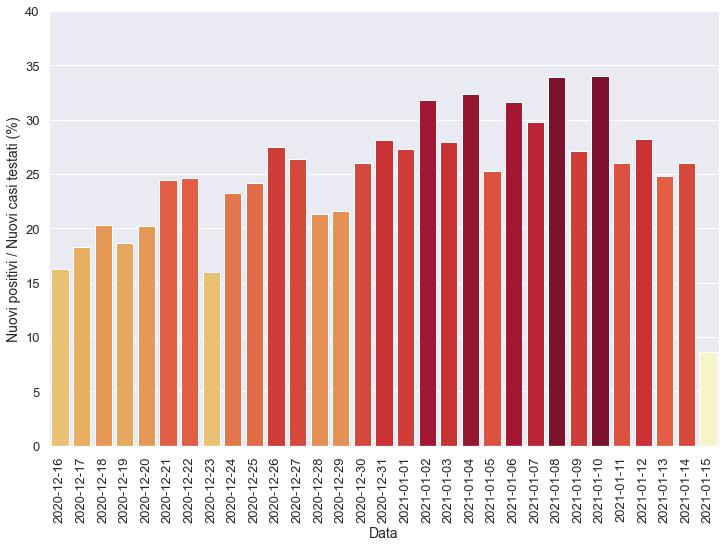

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

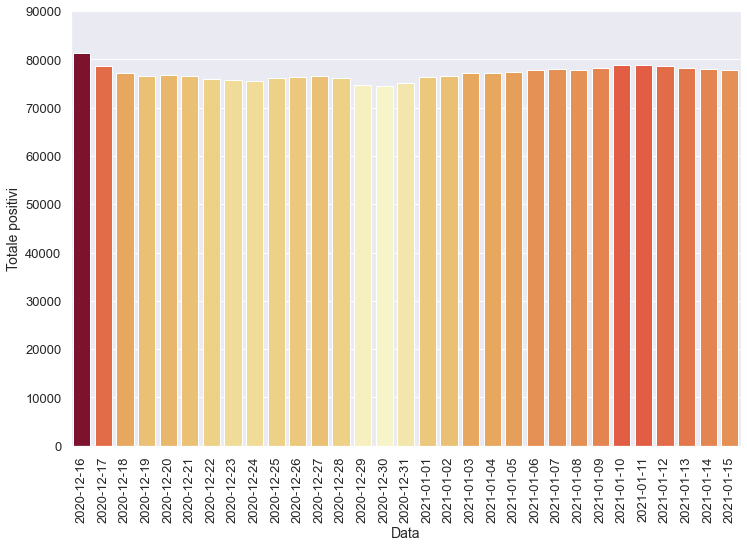

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

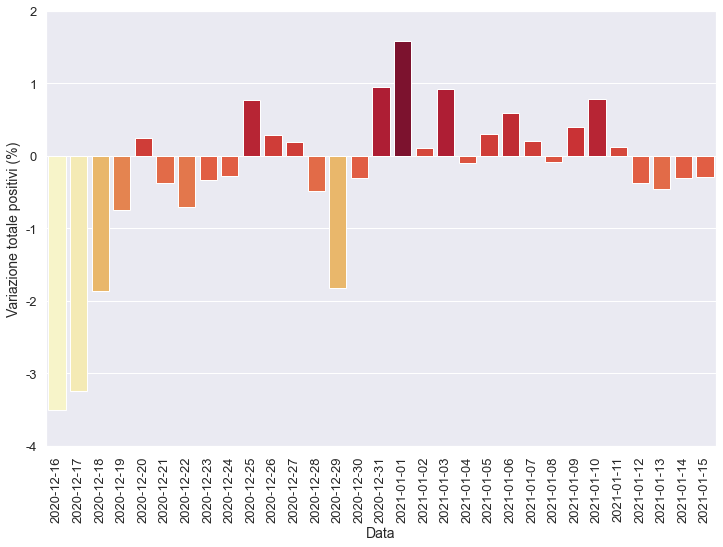

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

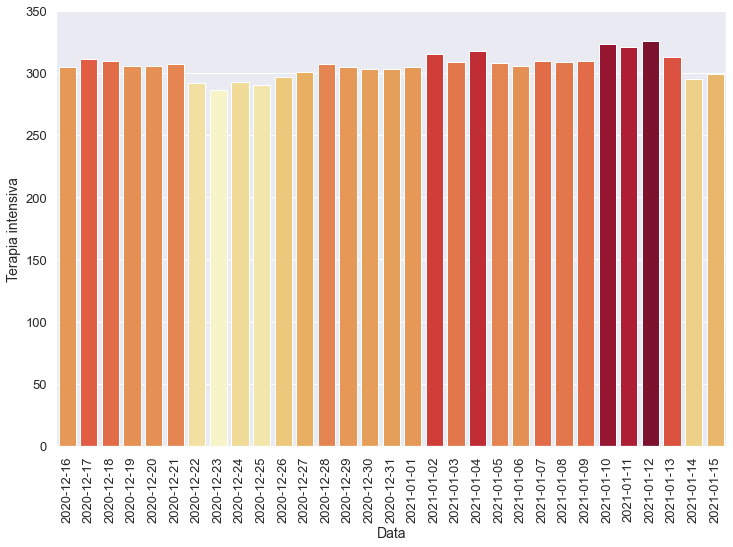

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

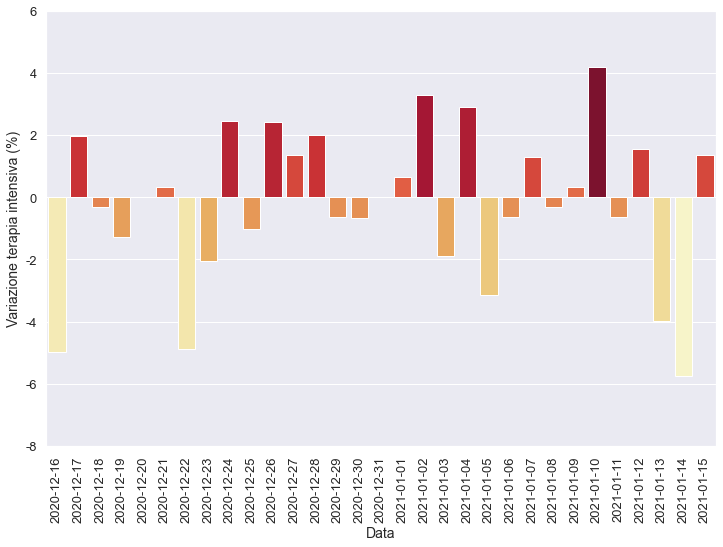

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

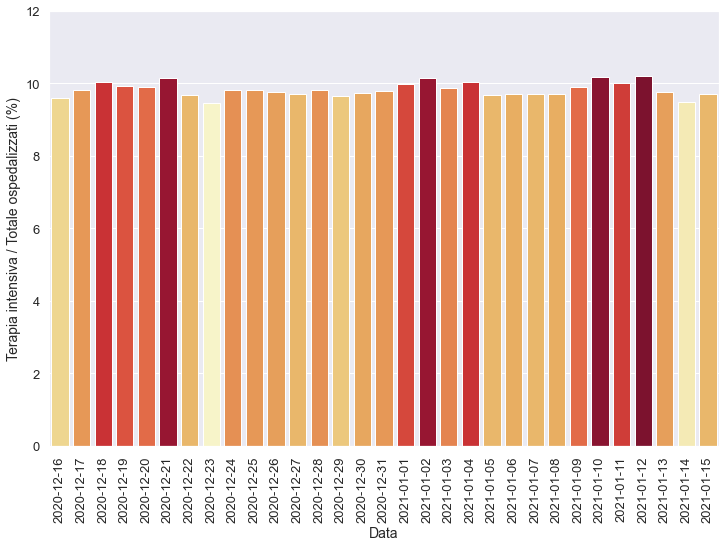

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

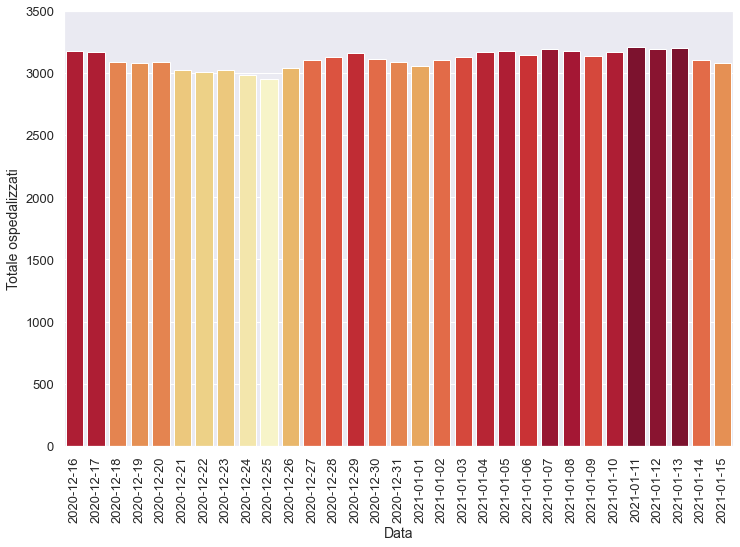

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

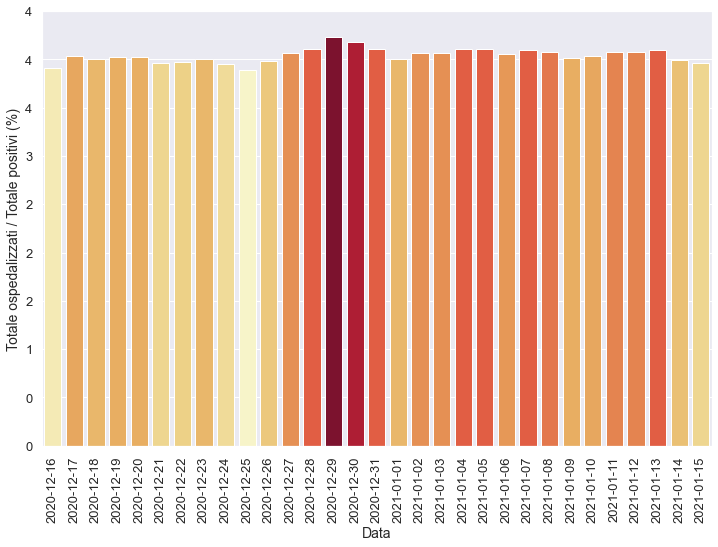

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

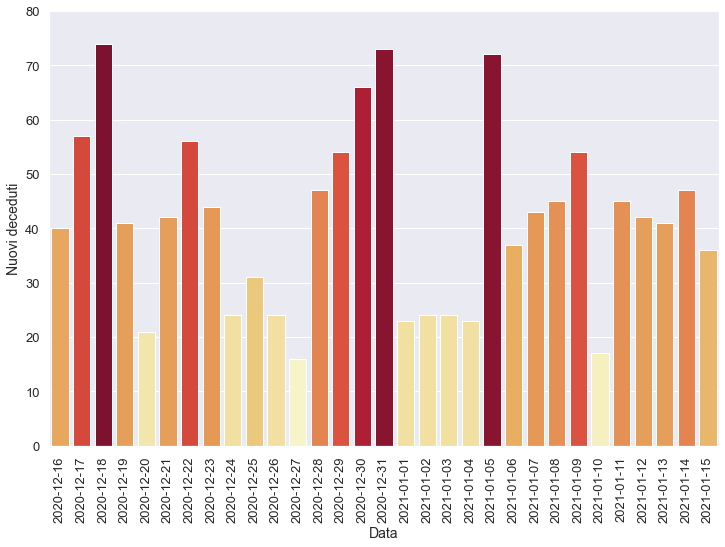

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

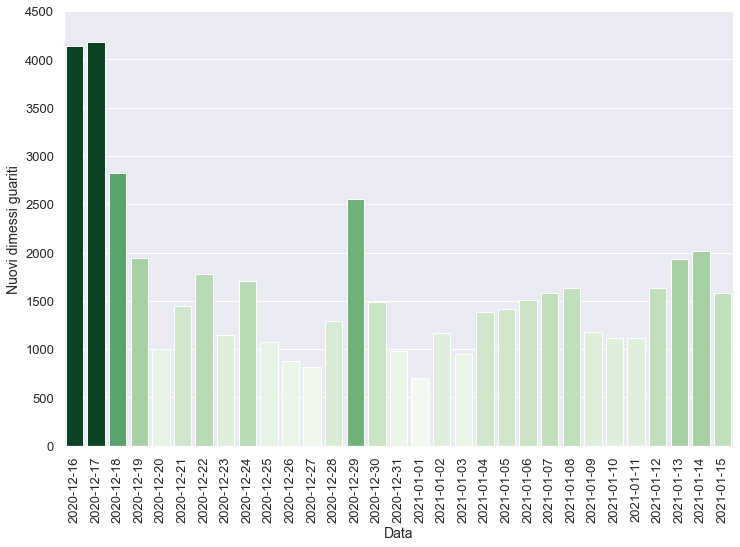

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-08T17:00:00,12,Lazio,2871,309,3180,74675,77855,-68,1613,...,45.0,12614.0,4751.0,-56.0,9.72,4.08,12.79,33.95,-0.32,-0.09
1,2021-01-09T17:00:00,12,Lazio,2824,310,3134,75035,78169,314,1543,...,54.0,11982.0,5688.0,360.0,9.89,4.01,12.88,27.13,0.32,0.40
2,2021-01-10T17:00:00,12,Lazio,2850,323,3173,75612,78785,616,1746,...,17.0,11706.0,5132.0,577.0,10.18,4.03,14.92,34.02,4.19,0.79
3,2021-01-11T17:00:00,12,Lazio,2887,321,3208,75673,78881,96,1254,...,45.0,10501.0,4829.0,61.0,10.01,4.07,11.94,25.97,-0.62,0.12
4,2021-01-12T17:00:00,12,Lazio,2871,326,3197,75390,78587,-294,1381,...,42.0,13201.0,4896.0,-283.0,10.20,4.07,10.46,28.21,1.56,-0.37
5,2021-01-13T17:00:00,12,Lazio,2892,313,3205,75018,78223,-364,1612,...,41.0,13678.0,6504.0,-372.0,9.77,4.10,11.79,24.78,-3.99,-0.46
6,2021-01-14T17:00:00,12,Lazio,2814,295,3109,74871,77980,-243,1816,...,47.0,14005.0,6972.0,-147.0,9.49,3.99,12.97,26.05,-5.75,-0.31
7,2021-01-15T17:00:00,12,Lazio,2780,299,3079,74676,77755,-225,1394,...,36.0,28242.0,16200.0,-195.0,9.71,3.96,4.94,8.60,1.36,-0.29


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

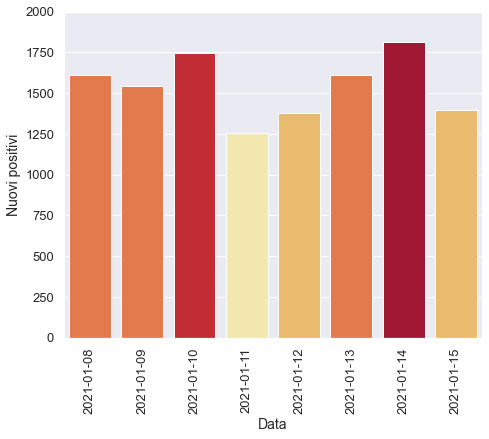

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

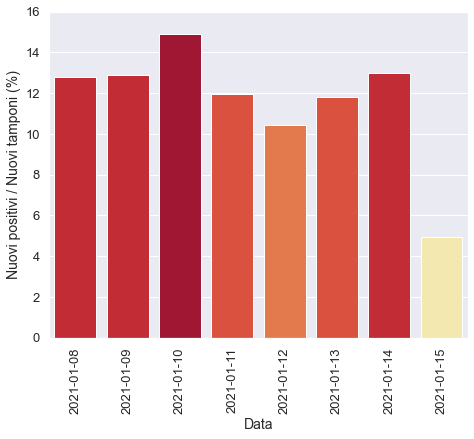

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

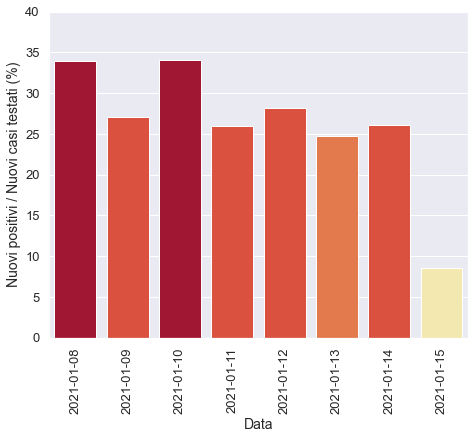

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

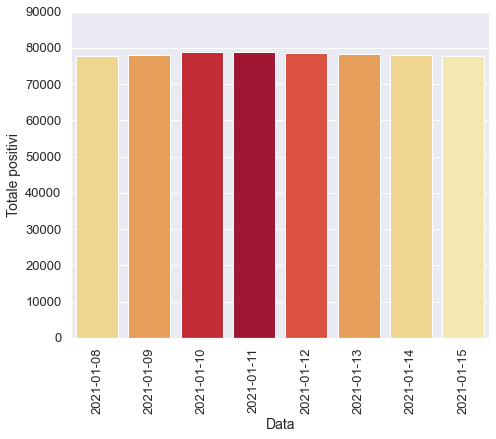

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

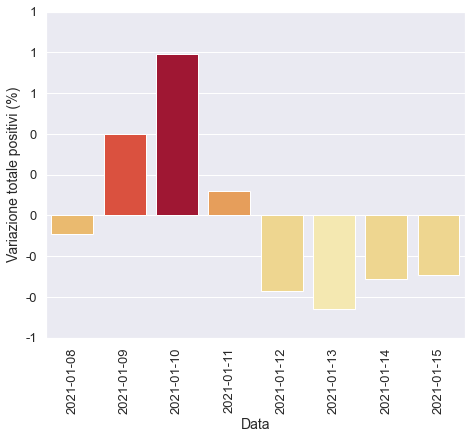

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

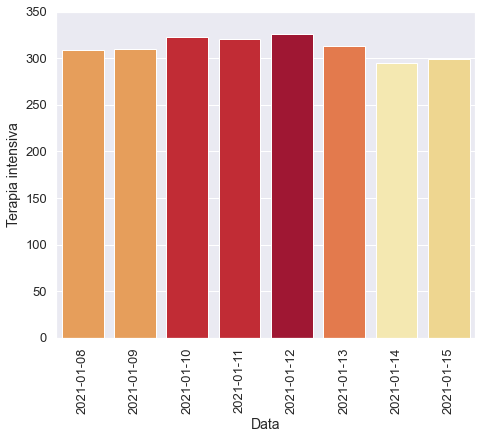

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

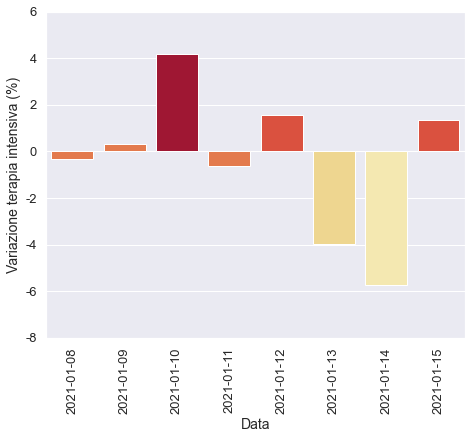

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

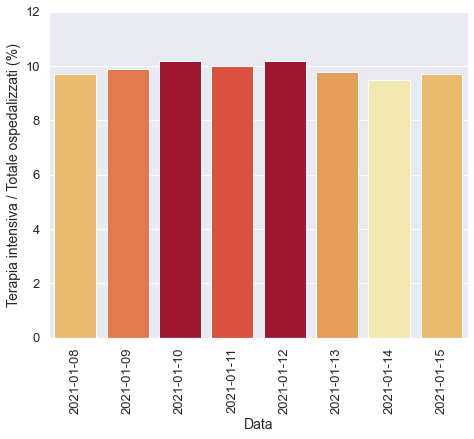

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

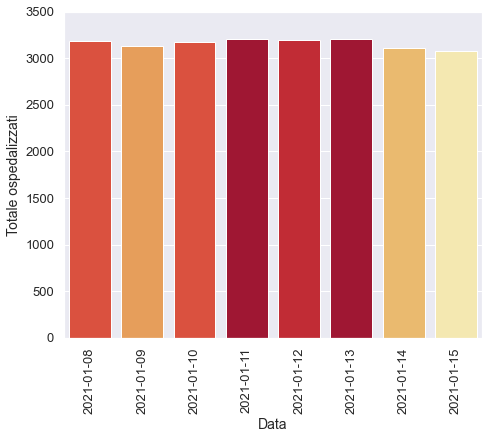

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

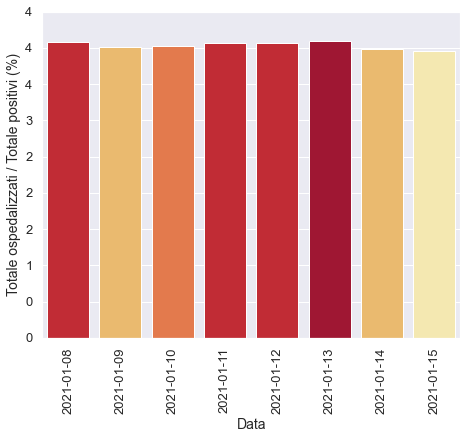

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

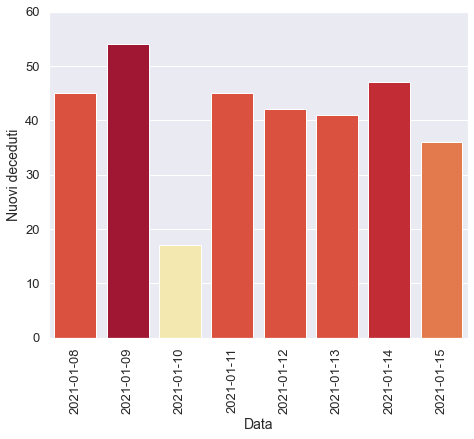

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

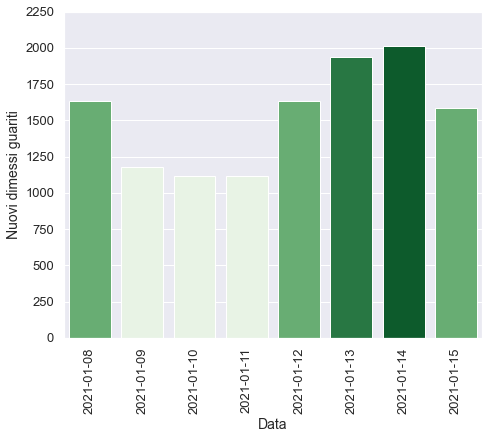

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)